In [229]:
## Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis,pearsonr
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif

In [675]:
## Read the file
churn = pd.read_csv('churn_hr.txt',delimiter=',')
churn.head()

,Age,Gender,MaritalStatus,Education,EducationField,JobRole,Department,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn
0,41,Female,Single,College,Life Sciences,Sales Executive,Sales,Travel_Rarely,5993,1,Very High,High,Low,Excellent,6,4,0,5,Yes
1,49,Male,Married,Below College,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,5130,8,Medium,Medium,Very High,Outstanding,10,7,1,7,No
2,37,Male,Single,College,Other,Laboratory Technician,Research & Development,Travel_Rarely,2090,2,High,Medium,Medium,Excellent,0,0,0,0,Yes
3,33,Female,Married,Master,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,2909,3,High,High,High,Excellent,8,7,3,0,No
4,27,Male,Married,Below College,Medical,Laboratory Technician,Research & Development,Travel_Rarely,3468,2,Medium,High,Very High,Excellent,2,2,2,2,No


In [22]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Gender                    1470 non-null   object
 2   MaritalStatus             1470 non-null   object
 3   Education                 1470 non-null   object
 4   EducationField            1470 non-null   object
 5   JobRole                   1470 non-null   object
 6   Department                1470 non-null   object
 7   BusinessTravel            1470 non-null   object
 8   MonthlyIncome             1470 non-null   int64 
 9   DistanceFromHome          1470 non-null   int64 
 10  JobSatisfaction           1470 non-null   object
 11  JobInvolvement            1470 non-null   object
 12  RelationshipSatisfaction  1470 non-null   object
 13  PerformanceRating         1470 non-null   object
 14  YearsAtCompany          

In [10]:
print(churn.isnull().any().sum())

0


In [338]:
churn.describe()

,Age,MonthlyIncome,DistanceFromHome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,9.192517,7.008163,4.229252,2.187755,4.123129
std,9.135373,4707.956783,8.106864,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4919.000000,7.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8379.000000,14.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,29.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
## Data preprocessing

In [ ]:
## Using integer values to represent the specific catogories.

In [635]:
churn_obj = churn.select_dtypes(include=['object']).columns
table_obj = []
for col in churn_obj:
    unique_values = churn[col].unique()
    for value in unique_values:
        table_obj.append([col, value])
churn_obj = pd.DataFrame(table_obj, columns=['Variable', 'Category'])
print(churn_obj)

                    Variable                   Category
0                     Gender                     Female
1                     Gender                       Male
2              MaritalStatus                     Single
3              MaritalStatus                    Married
4              MaritalStatus                   Divorced
5                  Education                    College
6                  Education              Below College
7                  Education                     Master
8                  Education                   Bachelor
9                  Education                     Doctor
10            EducationField              Life Sciences
11            EducationField                      Other
12            EducationField                    Medical
13            EducationField                  Marketing
14            EducationField           Technical Degree
15            EducationField            Human Resources
16                   JobRole            Sales Ex

In [ ]:
### Binary Variables

In [677]:
churn_data = churn.copy()

In [679]:
churn_data['Gender'] = churn_data['Gender'].map({'Female': 1, 'Male': 0})
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})
churn_data.head(10)

,Age,Gender,MaritalStatus,Education,EducationField,JobRole,Department,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn
0,41,1,Single,College,Life Sciences,Sales Executive,Sales,Travel_Rarely,5993,1,Very High,High,Low,Excellent,6,4,0,5,1
1,49,0,Married,Below College,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,5130,8,Medium,Medium,Very High,Outstanding,10,7,1,7,0
2,37,0,Single,College,Other,Laboratory Technician,Research & Development,Travel_Rarely,2090,2,High,Medium,Medium,Excellent,0,0,0,0,1
3,33,1,Married,Master,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,2909,3,High,High,High,Excellent,8,7,3,0,0
4,27,0,Married,Below College,Medical,Laboratory Technician,Research & Development,Travel_Rarely,3468,2,Medium,High,Very High,Excellent,2,2,2,2,0
5,32,0,Single,College,Life Sciences,Laboratory Technician,Research & Development,Travel_Frequently,3068,2,Very High,High,High,Excellent,7,7,3,6,0
6,59,1,Married,Bachelor,Medical,Laboratory Technician,Research & Development,Travel_Rarely,2670,3,Low,Very High,Low,Outstanding,1,0,0,0,0
7,30,0,Divorced,Below College,Life Sciences,Laboratory Technician,Research & Development,Travel_Rarely,2693,24,High,High,Medium,Outstanding,1,0,0,0,0
8,38,0,Single,Bachelor,Life Sciences,Manufacturing Director,Research & Development,Travel_Frequently,9526,23,High,Medium,Medium,Outstanding,9,7,1,8,0
9,36,0,Married,Bachelor,Medical,Healthcare Representative,Research & Development,Travel_Rarely,5237,27,High,High,Medium,Excellent,7,7,7,7,0


In [ ]:
### Ordinal Variables

In [681]:
order = {
    'Education': ['Below College', 'College', 'Bachelor','Master', 'Doctor'],
    'JobInvolvement': ['Low', 'Medium', 'High', 'Very High'],
    'JobSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'PerformanceRating': ['Excellent', 'Outstanding'],
    'RelationshipSatisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
}

for col, order in order.items():
    churn_data[col] = pd.Categorical(churn_data[col], categories=order, ordered=True).codes

In [645]:
churn_data.head(10)

,Age,Gender,MaritalStatus,Education,EducationField,JobRole,Department,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn
0,41,1,Single,1,Life Sciences,Sales Executive,Sales,1,5993,1,3,2,0,0,6,4,0,5,1
1,49,0,Married,0,Life Sciences,Research Scientist,Research & Development,2,5130,8,1,1,3,1,10,7,1,7,0
2,37,0,Single,1,Other,Laboratory Technician,Research & Development,1,2090,2,2,1,1,0,0,0,0,0,1
3,33,1,Married,3,Life Sciences,Research Scientist,Research & Development,2,2909,3,2,2,2,0,8,7,3,0,0
4,27,0,Married,0,Medical,Laboratory Technician,Research & Development,1,3468,2,1,2,3,0,2,2,2,2,0
5,32,0,Single,1,Life Sciences,Laboratory Technician,Research & Development,2,3068,2,3,2,2,0,7,7,3,6,0
6,59,1,Married,2,Medical,Laboratory Technician,Research & Development,1,2670,3,0,3,0,1,1,0,0,0,0
7,30,0,Divorced,0,Life Sciences,Laboratory Technician,Research & Development,1,2693,24,2,2,1,1,1,0,0,0,0
8,38,0,Single,2,Life Sciences,Manufacturing Director,Research & Development,2,9526,23,2,1,1,1,9,7,1,8,0
9,36,0,Married,2,Medical,Healthcare Representative,Research & Development,1,5237,27,2,2,1,0,7,7,7,7,0


In [ ]:
### Create dummy variables.

In [683]:
#### MaritalStatus EducationField JobRole Department 

EducationField_dummies = pd.get_dummies(churn_data.EducationField,prefix='EF.', drop_first=True)              
churn_data = pd.concat([churn_data, EducationField_dummies], axis=1)   

JobRole_dummies = pd.get_dummies(churn_data.JobRole,prefix='JR.', drop_first=True)              
churn_data = pd.concat([churn_data, JobRole_dummies], axis=1) 

Department_dummies = pd.get_dummies(churn_data.Department,prefix='DP.', drop_first=True)
churn_data = pd.concat([churn_data, Department_dummies], axis=1)

MaritalStatus_dummies = pd.get_dummies(churn_data.MaritalStatus,prefix='MS.', drop_first=True)
churn_data = pd.concat([churn_data, MaritalStatus_dummies], axis=1)

churn_data.drop(['EducationField','JobRole','Department','MaritalStatus'], axis=1, inplace=True)       
churn_data = churn_data.astype(int)
churn_data.head(10)

,Age,Gender,Education,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,...,JR._Manager,JR._Manufacturing Director,JR._Research Director,JR._Research Scientist,JR._Sales Executive,JR._Sales Representative,DP._Research & Development,DP._Sales,MS._Married,MS._Single
0,41,1,1,1,5993,1,3,2,0,0,...,0,0,0,0,1,0,0,1,0,1
1,49,0,0,2,5130,8,1,1,3,1,...,0,0,0,1,0,0,1,0,1,0
2,37,0,1,1,2090,2,2,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,33,1,3,2,2909,3,2,2,2,0,...,0,0,0,1,0,0,1,0,1,0
4,27,0,0,1,3468,2,1,2,3,0,...,0,0,0,0,0,0,1,0,1,0
5,32,0,1,2,3068,2,3,2,2,0,...,0,0,0,0,0,0,1,0,0,1
6,59,1,2,1,2670,3,0,3,0,1,...,0,0,0,0,0,0,1,0,1,0
7,30,0,0,1,2693,24,2,2,1,1,...,0,0,0,0,0,0,1,0,0,0
8,38,0,2,2,9526,23,2,1,1,1,...,0,1,0,0,0,0,1,0,0,1
9,36,0,2,1,5237,27,2,2,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
## Calculate the churn rate

In [649]:
churned_number = churn[churn['Churn']=='Yes'].shape[0]
total_number = churn.shape[0]
churn_rate = churned_number/total_number
print(f"The churn rate among the company's employees is {churn_rate * 100:.2f}%")

The churn rate among the company's employees is 16.12%


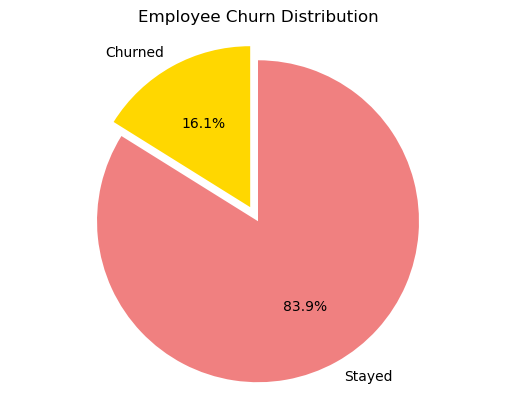

In [651]:
plt.pie([churned_number, total_number - churned_number], 
        labels=['Churned', 'Stayed'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1,0),
        colors=['gold','lightcoral'])
plt.title('Employee Churn Distribution')
plt.axis('equal')
plt.show()

In [ ]:
## Distribution of Variables------add more graphs.

In [424]:
## Numeric Varibles
# churn_num = churn_data.select_dtypes(include=[np.number])

In [428]:
summary_data = pd.DataFrame({
    'Variable': churn_data.columns,
    'Max': churn_data.max(),
    'Min': churn_data.min(),
    'Mean': churn_data.mean(),
    'Median': churn_data.median(),
    'Variance': churn_data.var(),
    'Skewness': churn_data.apply(lambda x: skew(x, bias=False)),
    'Kurtosis': churn_data.apply(lambda x: kurtosis(x, bias=False))
})
summary_data.set_index('Variable', inplace=True)
print(summary_data)

                              Max   Min         Mean  Median      Variance  \
Variable                                                                     
Age                            60    18    36.923810    36.0  8.345505e+01   
Gender                          1     0     0.400000     0.0  2.401634e-01   
Education                       4     0     1.912925     2.0  1.048914e+00   
BusinessTravel                  2     0     1.086395     1.0  2.832048e-01   
MonthlyIncome               19999  1009  6502.931293  4919.0  2.216486e+07   
DistanceFromHome               29     1     9.192517     7.0  6.572125e+01   
JobSatisfaction                 3     0     1.728571     2.0  1.216270e+00   
JobInvolvement                  3     0     1.729932     2.0  5.063193e-01   
RelationshipSatisfaction        3     0     1.712245     2.0  1.169013e+00   
PerformanceRating               1     0     0.153741     0.0  1.301936e-01   
YearsAtCompany                 40     0     7.008163     5.0  3.

In [443]:
## Numeric Varibles
churn_num = churn.select_dtypes(include=[np.number])

In [445]:
summary_num = pd.DataFrame({
    'Variable': churn_num.columns,
    'Max': churn_num.max(),
    'Min': churn_num.min(),
    'Mean': churn_num.mean(),
    'Median': churn_num.median(),
    'Variance': churn_num.var(),
    'Skewness': churn_num.apply(lambda x: skew(x, bias=False)),
    'Kurtosis': churn_num.apply(lambda x: kurtosis(x, bias=False))
})
summary_num.set_index('Variable', inplace=True)
print(summary_num)

                           Max   Min         Mean  Median      Variance  \
Variable                                                                  
Age                         60    18    36.923810    36.0  8.345505e+01   
MonthlyIncome            19999  1009  6502.931293  4919.0  2.216486e+07   
DistanceFromHome            29     1     9.192517     7.0  6.572125e+01   
YearsAtCompany              40     0     7.008163     5.0  3.753431e+01   
YearsInCurrentRole          18     0     4.229252     3.0  1.312712e+01   
YearsSinceLastPromotion     15     0     2.187755     1.0  1.038406e+01   
YearsWithCurrManager        17     0     4.123129     3.0  1.273160e+01   

                         Skewness  Kurtosis  
Variable                                     
Age                      0.413286 -0.404145  
MonthlyIncome            1.369817  1.005233  
DistanceFromHome         0.958118 -0.224833  
YearsAtCompany           1.764529  3.935509  
YearsInCurrentRole       0.917363  0.477421  
Ye

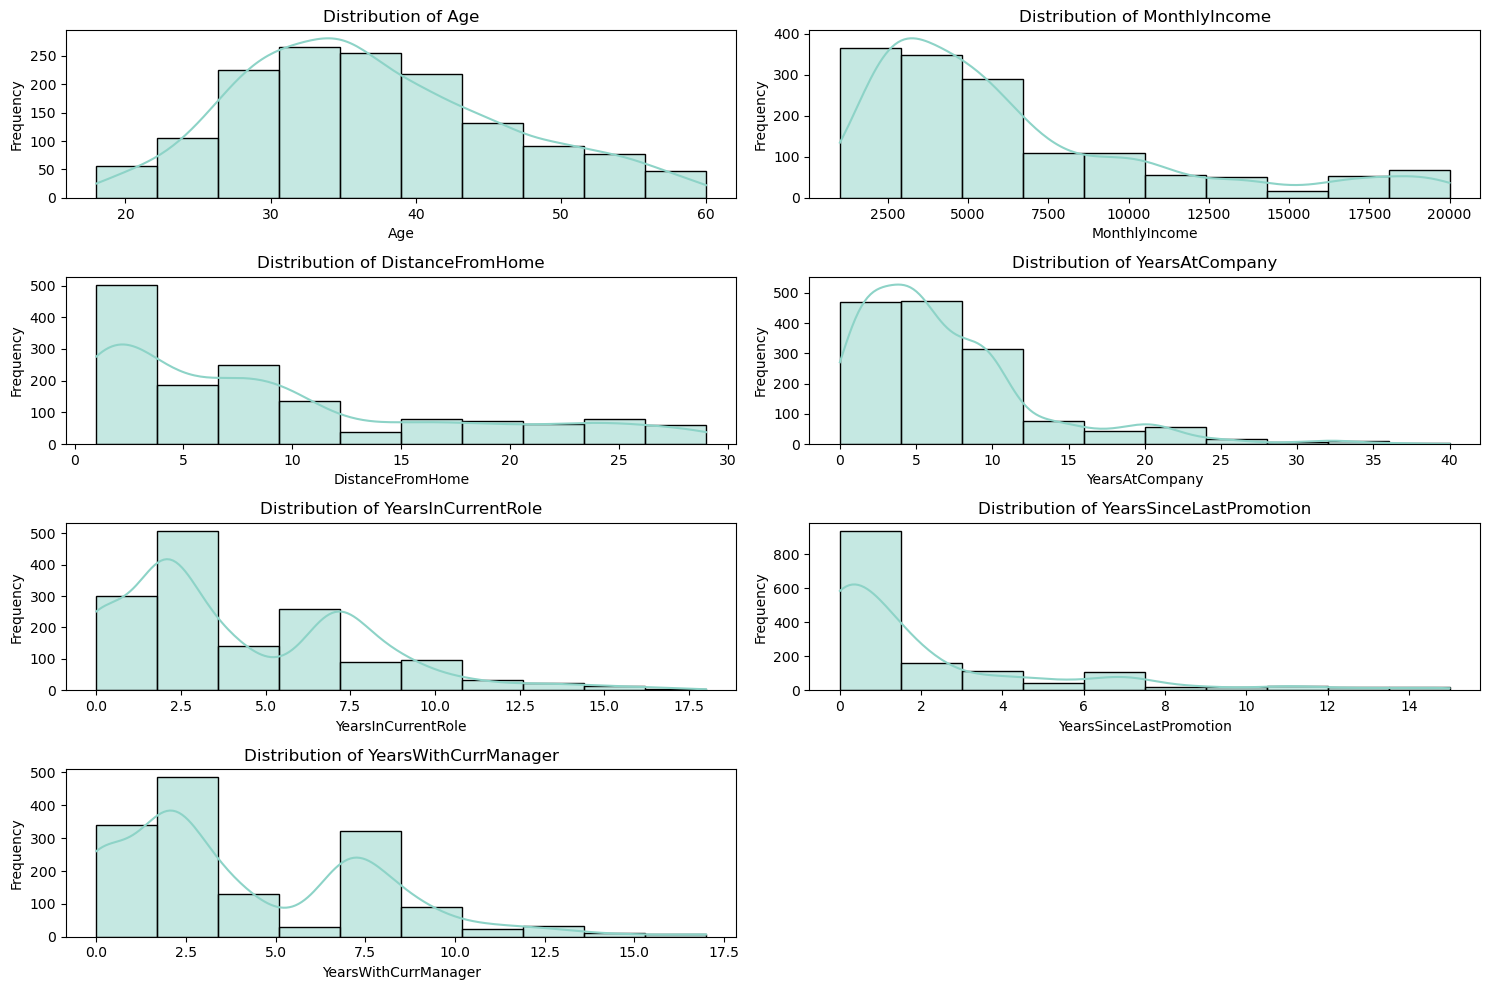

In [447]:
numeric_cols = churn_num.columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  
    sns.histplot(churn_num[col], kde=True, bins=10) 
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()  


In [455]:
## Object Varibles
churn_obj = churn.select_dtypes(include = [object])
churn_obj.head(10)

,Gender,MaritalStatus,Education,EducationField,JobRole,Department,BusinessTravel,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,Churn
0,Female,Single,College,Life Sciences,Sales Executive,Sales,Travel_Rarely,Very High,High,Low,Excellent,Yes
1,Male,Married,Below College,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,Medium,Medium,Very High,Outstanding,No
2,Male,Single,College,Other,Laboratory Technician,Research & Development,Travel_Rarely,High,Medium,Medium,Excellent,Yes
3,Female,Married,Master,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,High,High,High,Excellent,No
4,Male,Married,Below College,Medical,Laboratory Technician,Research & Development,Travel_Rarely,Medium,High,Very High,Excellent,No
5,Male,Single,College,Life Sciences,Laboratory Technician,Research & Development,Travel_Frequently,Very High,High,High,Excellent,No
6,Female,Married,Bachelor,Medical,Laboratory Technician,Research & Development,Travel_Rarely,Low,Very High,Low,Outstanding,No
7,Male,Divorced,Below College,Life Sciences,Laboratory Technician,Research & Development,Travel_Rarely,High,High,Medium,Outstanding,No
8,Male,Single,Bachelor,Life Sciences,Manufacturing Director,Research & Development,Travel_Frequently,High,Medium,Medium,Outstanding,No
9,Male,Married,Bachelor,Medical,Healthcare Representative,Research & Development,Travel_Rarely,High,High,Medium,Excellent,No


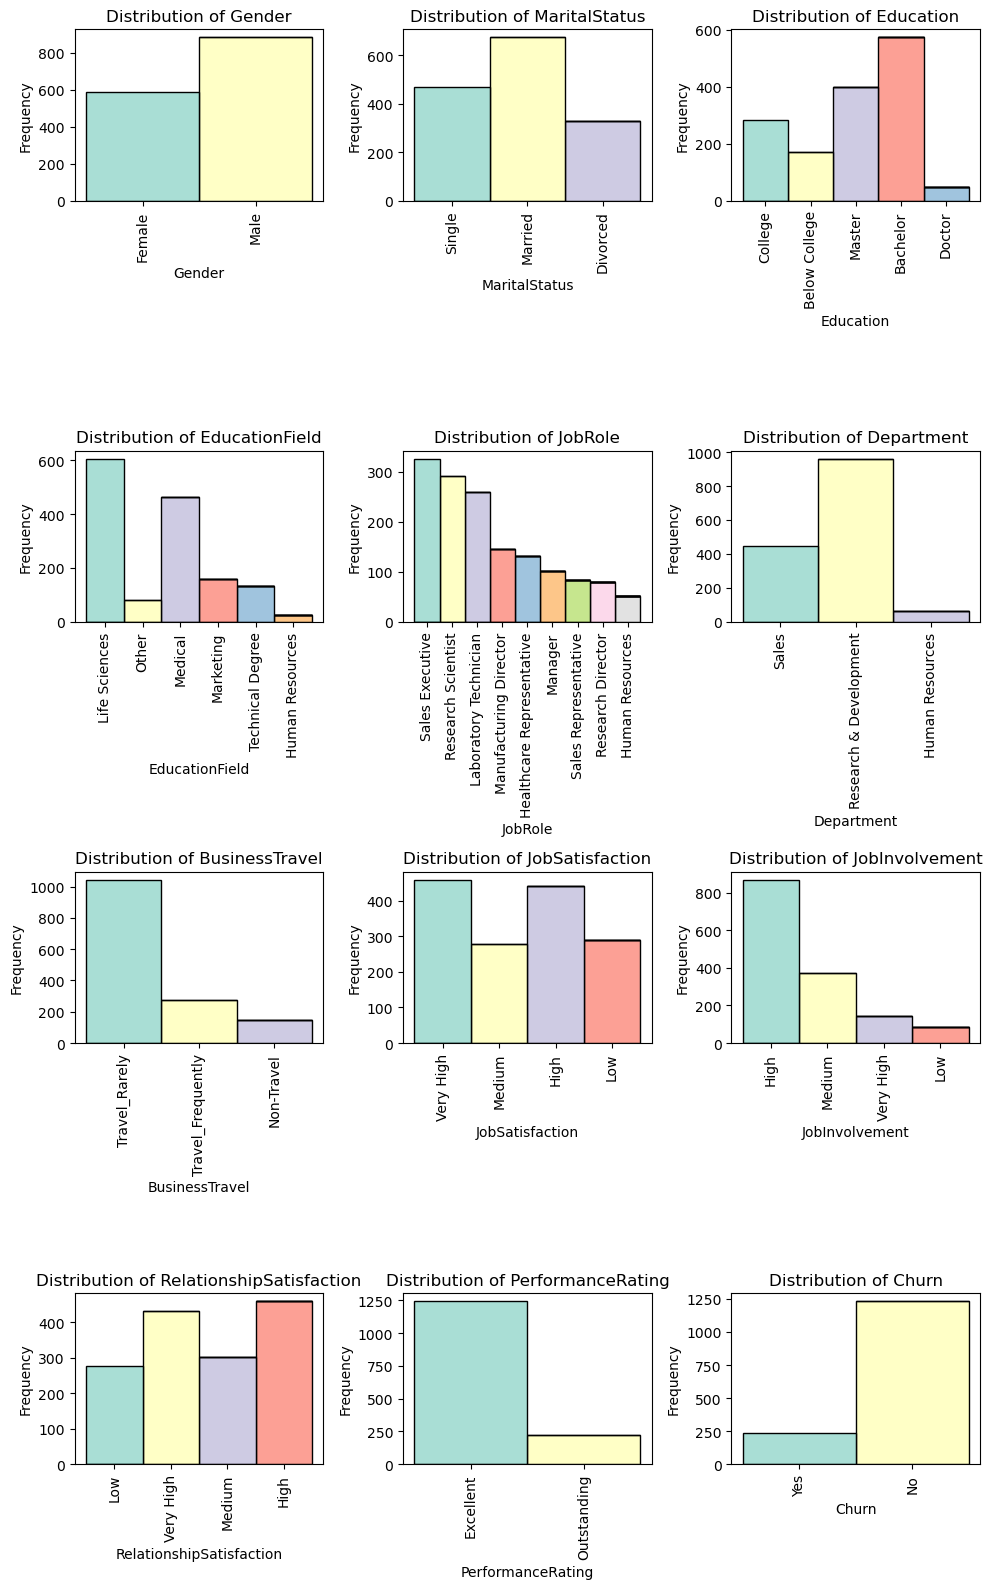

In [469]:
object_cols = churn_obj.columns
plt.figure(figsize=(10, 16))

for i, col in enumerate(object_cols):
    plt.subplot(4, 3, i + 1)  
    sns.histplot(data=churn, x=col, hue=col, multiple="stack", kde=False, bins=10,legend=False) 
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()  

In [ ]:
## QUestion 3

In [509]:
# Pearson Correlation
#print("Correlation Between Features")
#print(churn_data.drop(columns=['Churn']).corr())  

#def correlation_pvalues(df):
  #  df = df.dropna()._get_numeric_data()  
  #  pvalues = pd.DataFrame(index=df.columns, columns=df.columns)
  #  for r in df.columns:
    #    for c in df.columns:
   #         pvalues.loc[r, c] = round(pearsonr(df[r], df[c])[1], 4)  
  #  return pvalues

#print("Correlation Between Features with P-values")
#print(correlation_pvalues(churn_data.drop(columns=['Churn'])))

In [511]:
# Pearson Correlation---only print related variables.s
corr_matrix = churn_data.drop(columns=['Churn']).corr()  
p_value_matrix = correlation_pvalues(churn_data)

threshold_corr = 0.1
threshold_p = 0.05

significant_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) > threshold_corr) and (p_value_matrix.iloc[i, j] < threshold_p):
            significant_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j], p_value_matrix.iloc[i, j]))

significant_df = pd.DataFrame(significant_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-Value'])
#print(significant_df)
print(significant_df.to_string(max_rows=100)) 

                    Variable 1                  Variable 2  Correlation  P-Value
0                    Education                         Age     0.208034   0.0000
1                MonthlyIncome                         Age     0.497855   0.0000
2               YearsAtCompany                         Age     0.311309   0.0000
3               YearsAtCompany               MonthlyIncome     0.514285   0.0000
4           YearsInCurrentRole                         Age     0.212901   0.0000
5           YearsInCurrentRole               MonthlyIncome     0.363818   0.0000
6           YearsInCurrentRole              YearsAtCompany     0.758754   0.0000
7      YearsSinceLastPromotion                         Age     0.216513   0.0000
8      YearsSinceLastPromotion               MonthlyIncome     0.344978   0.0000
9      YearsSinceLastPromotion              YearsAtCompany     0.618409   0.0000
10     YearsSinceLastPromotion          YearsInCurrentRole     0.548056   0.0000
11        YearsWithCurrManag

In [ ]:
####NEED GRAPHS

In [ ]:
## Question 4

In [ ]:
## Drop JobRole, EducationFiled,Department, YearsWithCurrManger, YearsInCurrentRole and YearsAtCompany 

In [685]:
churn_data = churn_data.drop(columns=['YearsWithCurrManager', 'YearsSinceLastPromotion','YearsInCurrentRole'])
churn_data = churn_data.drop(columns=churn_data.filter(like='JR').columns)
churn_data = churn_data.drop(columns=churn_data.filter(like='EF').columns)
churn_data = churn_data.drop(columns=churn_data.filter(like='DP').columns)
churn_data.head(10)

,Age,Gender,Education,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,Churn,MS._Married,MS._Single
0,41,1,1,1,5993,1,3,2,0,0,6,1,0,1
1,49,0,0,2,5130,8,1,1,3,1,10,0,1,0
2,37,0,1,1,2090,2,2,1,1,0,0,1,0,1
3,33,1,3,2,2909,3,2,2,2,0,8,0,1,0
4,27,0,0,1,3468,2,1,2,3,0,2,0,1,0
5,32,0,1,2,3068,2,3,2,2,0,7,0,0,1
6,59,1,2,1,2670,3,0,3,0,1,1,0,1,0
7,30,0,0,1,2693,24,2,2,1,1,1,0,0,0
8,38,0,2,2,9526,23,2,1,1,1,9,0,0,1
9,36,0,2,1,5237,27,2,2,1,0,7,0,1,0


In [569]:
# Pearson Correlation
print("Correlation Between Features")
print(churn_data.corr())  

def correlation_pvalues(df):
    df = df.dropna()._get_numeric_data()  
    pvalues = pd.DataFrame(index=df.columns, columns=df.columns)
    for r in df.columns:
        for c in df.columns:
            pvalues.loc[r, c] = round(pearsonr(df[r], df[c])[1], 4)  
    return pvalues

print("Correlation Between Features with P-values")
print(correlation_pvalues(churn_data))

Correlation Between Features
                               Age    Gender  Education  BusinessTravel  \
Age                       1.000000  0.036311   0.208034       -0.011807   
Gender                    0.036311  1.000000   0.016547        0.044896   
Education                 0.208034  0.016547   1.000000       -0.008670   
BusinessTravel           -0.011807  0.044896  -0.008670        1.000000   
MonthlyIncome             0.497855  0.031858   0.094961       -0.013450   
DistanceFromHome         -0.001686  0.001851   0.021042       -0.009696   
JobSatisfaction          -0.004892 -0.033252  -0.011296        0.008666   
JobInvolvement            0.029820 -0.017960   0.042438        0.029300   
RelationshipSatisfaction  0.053535 -0.022868  -0.009118        0.008926   
PerformanceRating         0.001904  0.013859  -0.024539        0.001683   
YearsAtCompany            0.311309  0.029747   0.069114        0.005212   
Churn                    -0.159205 -0.029453  -0.031373        0.127006

In [687]:
# Pearson Correlation---only print related variables.s
corr_matrix = churn_data.corr()  
p_value_matrix = correlation_pvalues(churn_data)

threshold_corr = 0.1
threshold_p = 0.05

significant_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) > threshold_corr) and (p_value_matrix.iloc[i, j] < threshold_p):
            significant_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j], p_value_matrix.iloc[i, j]))

significant_df = pd.DataFrame(significant_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-Value'])
#print(significant_df)
print(significant_df.to_string(max_rows=100)) 

        Variable 1       Variable 2  Correlation  P-Value
0        Education              Age     0.208034   0.0000
1    MonthlyIncome              Age     0.497855   0.0000
2   YearsAtCompany              Age     0.311309   0.0000
3   YearsAtCompany    MonthlyIncome     0.514285   0.0000
4            Churn              Age    -0.159205   0.0000
5            Churn   BusinessTravel     0.127006   0.0000
6            Churn    MonthlyIncome    -0.159840   0.0000
7            Churn  JobSatisfaction    -0.103481   0.0001
8            Churn   JobInvolvement    -0.130016   0.0000
9            Churn   YearsAtCompany    -0.134392   0.0000
10      MS._Single              Age    -0.119185   0.0000
11      MS._Single            Churn     0.175419   0.0000
12      MS._Single      MS._Married    -0.629981   0.0000


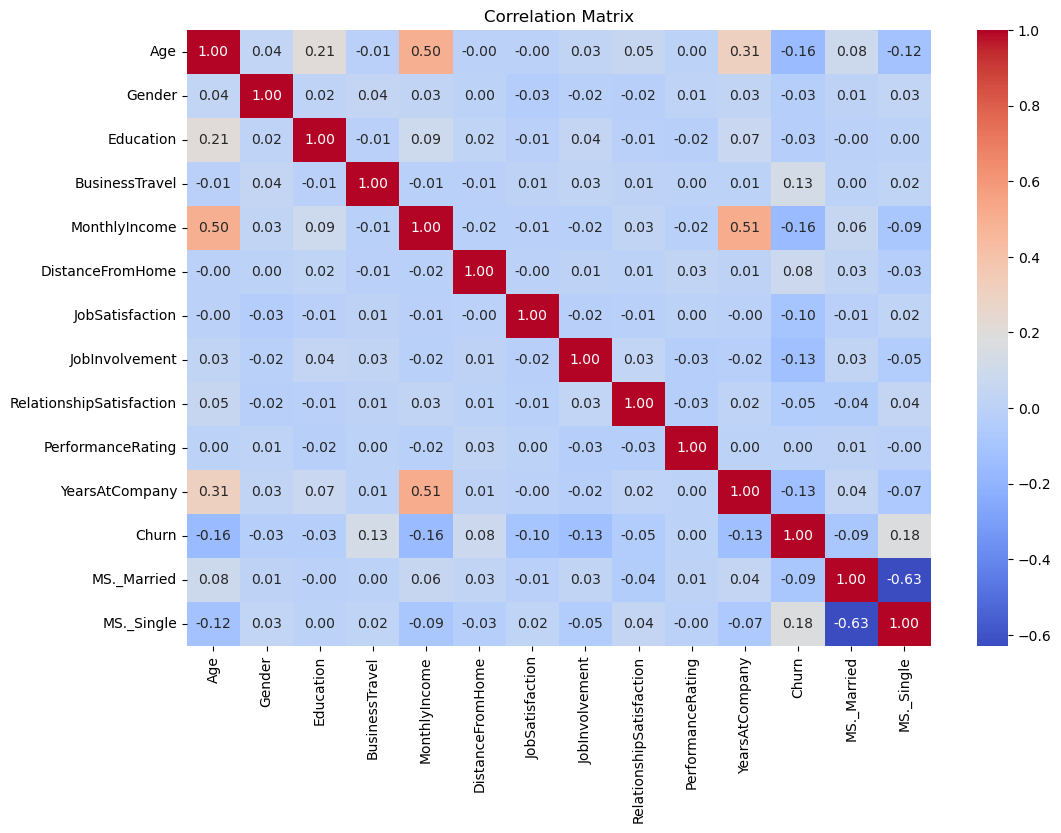

In [689]:
plt.figure(figsize=(12, 8))
sns.heatmap(churn_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [691]:
X = churn_data.drop(columns=['Churn'])  
Y = churn_data['Churn'] 

select_k_best_classifier = SelectKBest(score_func=f_classif, k=8)
select_k_best_classifier.fit(X, Y)
mask = select_k_best_classifier.get_support()

new_features = []
for bool, feature in zip(mask, X.columns):
    if bool:
        new_features.append(feature)

print("Selected features:", new_features)

Selected features: ['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'MS._Married', 'MS._Single']


In [716]:
## Randomforest 
X = churn_data.drop(['Churn'], axis=1)
Y = churn_data['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

rf = RandomForestClassifier(min_samples_split=30, random_state=15)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)                                            

def predict_employee_churn(model):
    print("Enter Information:")
    print("Age,Gender,Education,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,MS._Married,MS._Single")
    
    user_input = input("Enter Information: ")
    input_data = user_input.split(",")
    
    # Convert input data to the appropriate data types
    input_data = [float(i) if i.replace('.', '', 1).isdigit() else i for i in input_data]
    
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Make prediction
    prediction = model.predict(input_df)

    if prediction[0] == 1:
        print("The employee is likely to resign.")
    else:
        print("The employee is not likely to resign.")

RF_Accuracy = (metrics.accuracy_score(Y_test, Y_pred)) * 100
print("Random Forest Accuracy % = {} %".format(RF_Accuracy))

confusion = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion)
print('Classification Report:')
print(classification_report(y_test, y_pred))
predict_employee_churn(rf)

Random Forest Accuracy % = 87.07482993197279 %
[[253   0]
 [ 38   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       380
           1       0.40      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.64      0.57      0.59       441
weighted avg       0.81      0.85      0.83       441

Enter Information:
Age,Gender,Education,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,MS._Married,MS._Single


Enter Information:  50,1,4,0,10000,1,2,2,2,1,5,1,0


The employee is not likely to resign.
